## R Markdown

This is an R Markdown document. Markdown is a simple formatting syntax for authoring HTML, PDF, and MS Word documents. For more details on using R Markdown see <http://rmarkdown.rstudio.com>.

When you click the **Knit** button a document will be generated that includes both content as well as the output of any embedded R code chunks within the document. You can embed an R code chunk like this:

In [1]:
library(conflicted)
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     


### Get current working directory

In [3]:
getwd()

[1] "/Users/dsl/Desktop/notebooks"

## Create a directory for output of images

In [4]:
# Check if a directory exists before creating it
img_path = "images"
if (!dir.exists(img_path)) {
  dir.create(img_path)
}

# Data Visualization with ggplot

Plotting a single discrete variable(Species) as a bar plot.  

Here the y-axis is the number of rows for each species.

Let's calculate the numbers we expect before generating the plot.

In [5]:
Sepal.Length_count = iris %>% group_by(Species) %>% summarize(Sepal.Length_cnt = length(Sepal.Length))
Sepal.Length_count

Species,Sepal.Length_cnt
<fct>,<int>
setosa,50
versicolor,50
virginica,50


Now, let's plot the data.

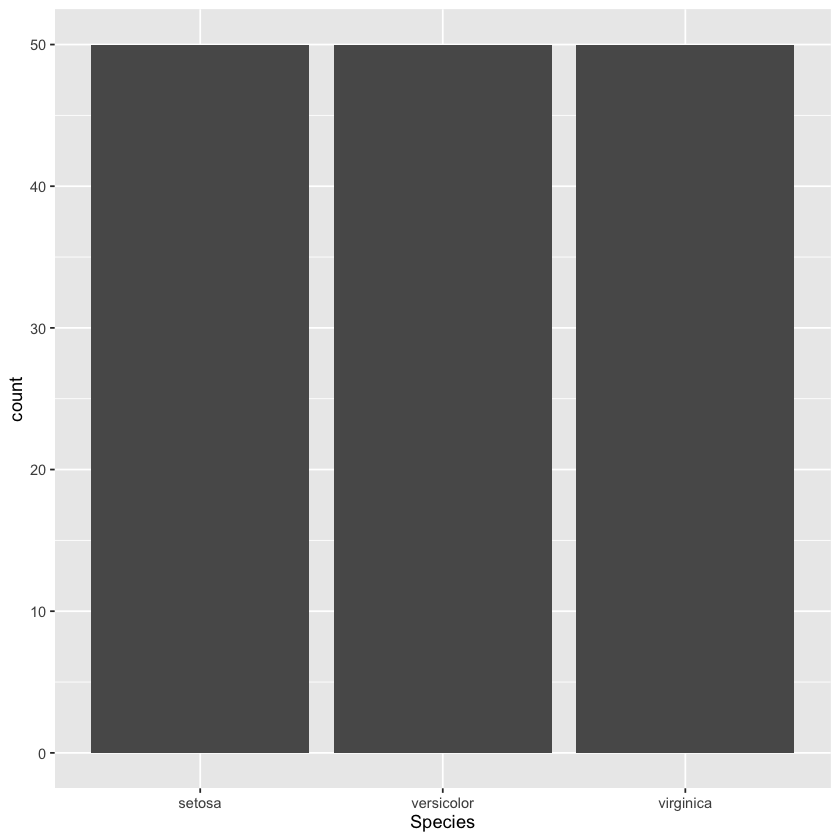

In [6]:
ggplot(iris, aes(x=Species)) + geom_bar()

Plotting a single continuous variable (Sepal.Length) as a histogram. 

Here the y-axis is the number of flowers in each length bin.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


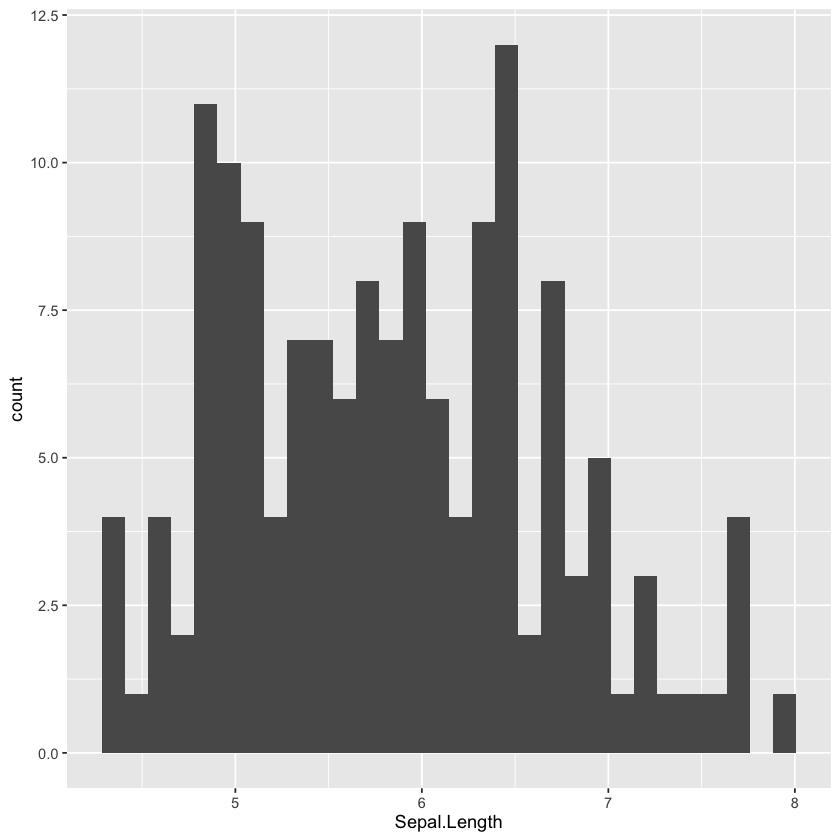

In [7]:
ggplot(iris, aes(x=Sepal.Length)) + geom_histogram()

ggplot gives a warning that the default binwidth may not be the most suitable for our data.  

We can specific binwidth by adding it to the histogram function options.

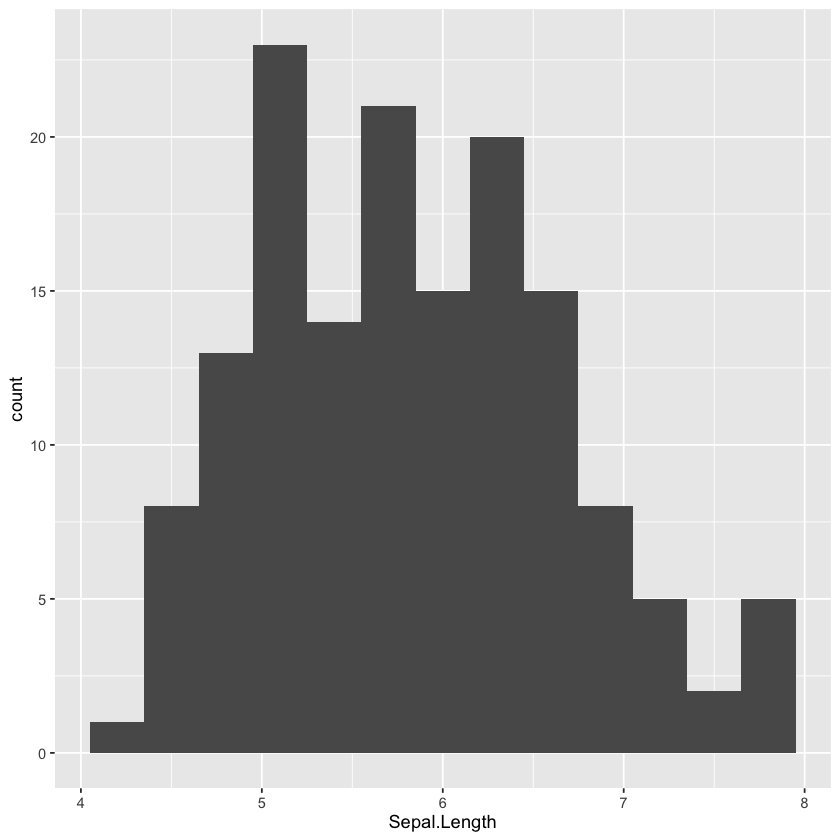

In [8]:
ggplot(iris, aes(x=Sepal.Length)) + geom_histogram(binwidth=.3)

Histograms are easier to create when the underlying data distribution is already known, making it harder to use for exploration.  It is also a count based method so comparing across data sets of differing numbers would be difficult. A density plot is similar to a histogram. 

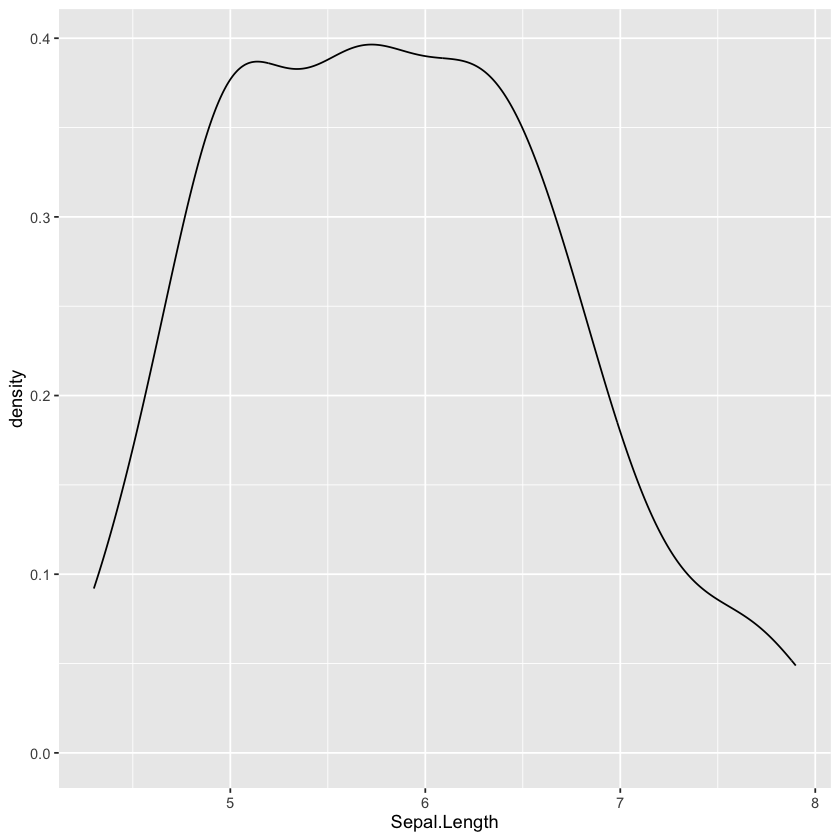

In [9]:
ggplot(iris, aes(Sepal.Length)) + geom_density()

Plotting discrete (species) and continuous (Sepal.Length) variables as a boxplot plot.

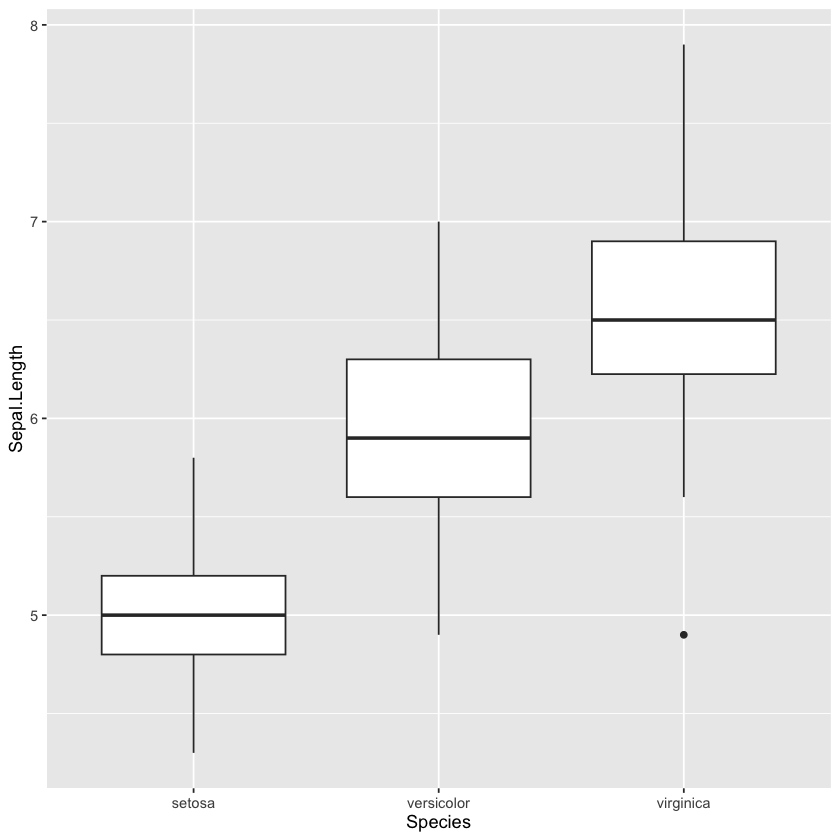

In [10]:
ggplot(iris, aes(x= Species, y=Sepal.Length)) + geom_boxplot()

Plotting two continuous variables (Sepal.Length and Sepal.Width) as a scatter plot.

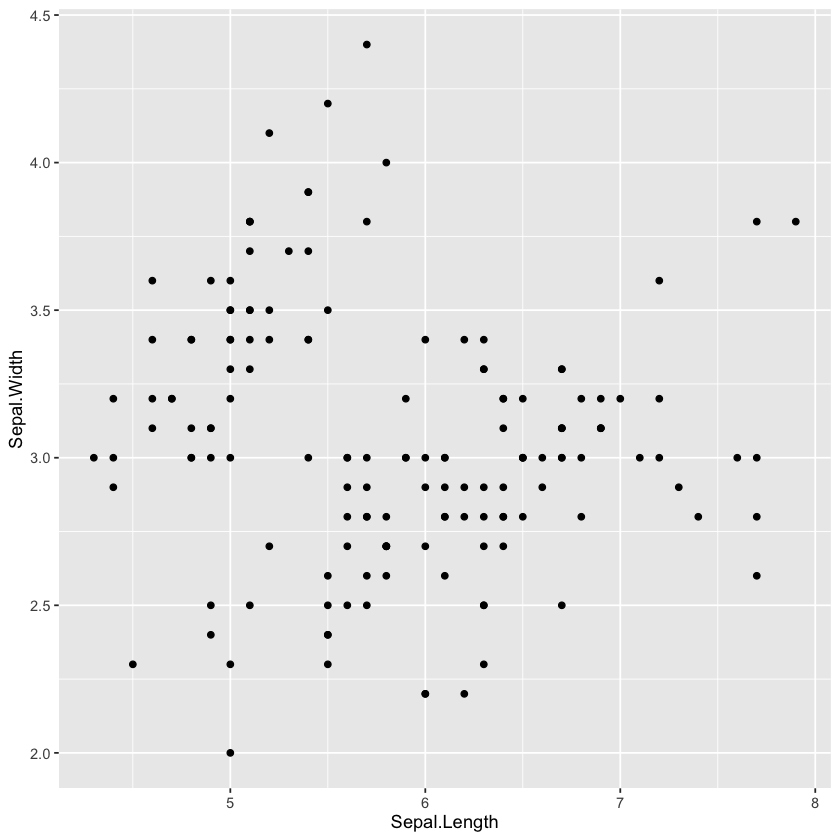

In [11]:
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width)) + geom_point()

Revisiting the layering concept, we can add a regression line to our previous plot by just adding that function to the previous command.  We want to plot a linear regression so we need to specify that in the method option. 

`geom_smooth()` using formula = 'y ~ x'


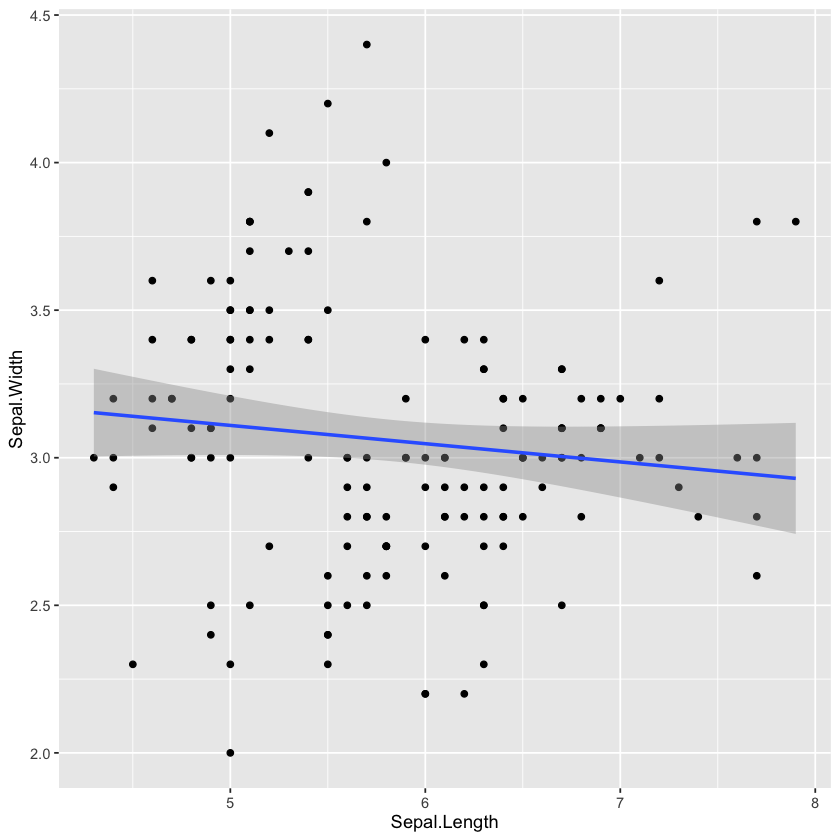

In [12]:
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width)) + geom_point() + geom_smooth(method=lm)

We can create a scatter plot with sepaal length versus sepal width and add color to the points based on species.  

This will also be passed to the regression line so there will now be a separate regression line for each species.

`geom_smooth()` using formula = 'y ~ x'


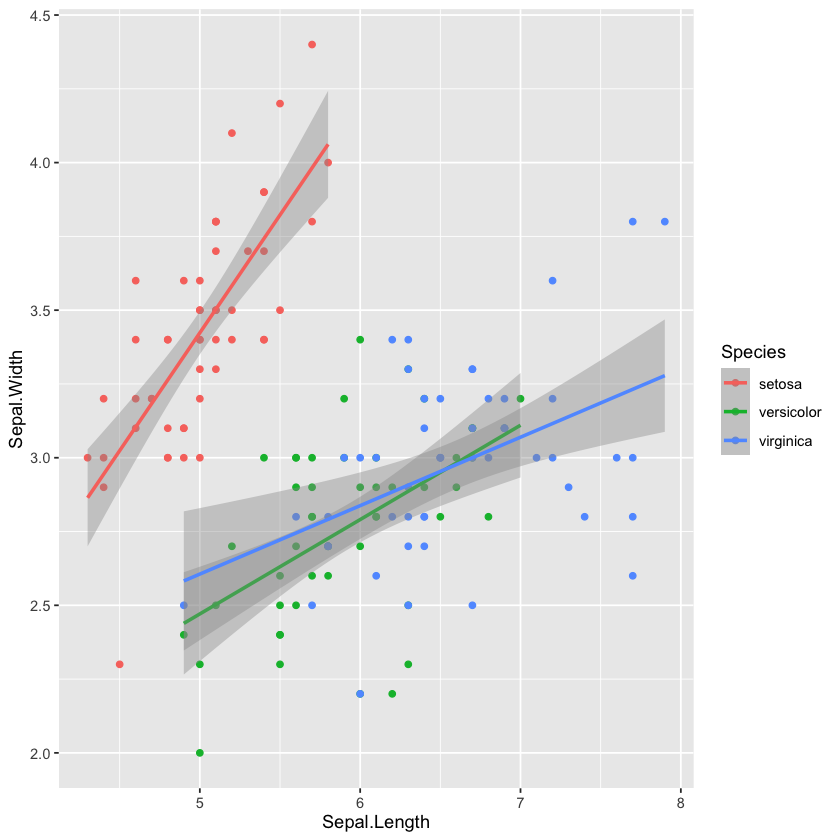

In [13]:
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species)) + geom_point() + geom_smooth(method=lm)

The points and lines overlap to some degree so it is difficult to see if there are any differences.  We can instead automatically generate a graph for each value in a discrete variable using the facet wrap function.

`geom_smooth()` using formula = 'y ~ x'


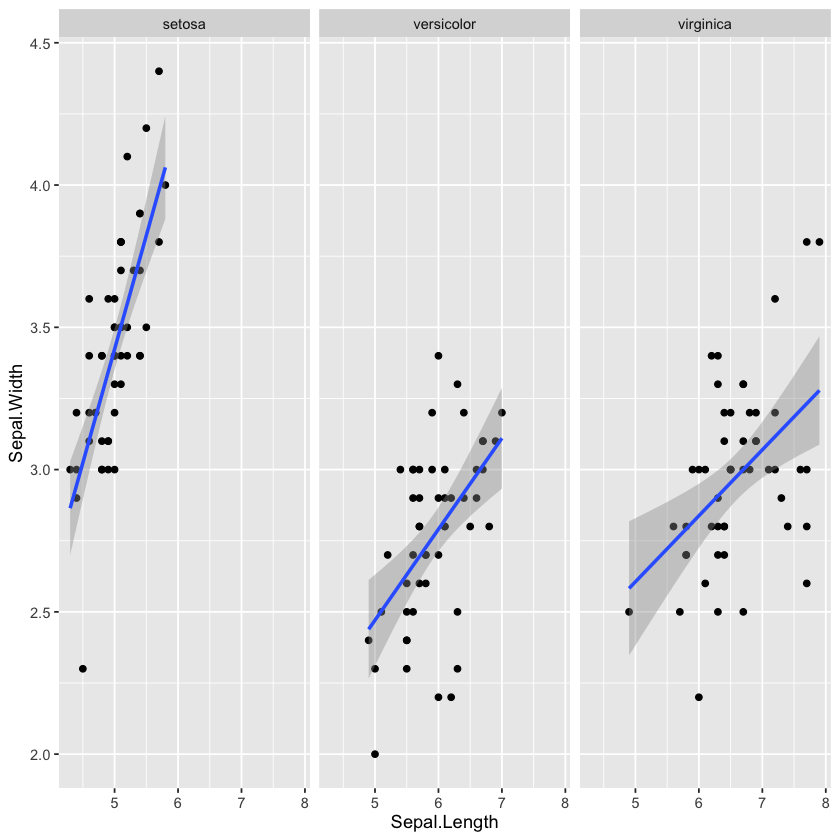

In [14]:
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width)) + geom_point() + geom_smooth(method = lm) + facet_wrap(vars(Species), nrow=1)

Let's say we want to create density plots for all of the continuous data to get a quick look at data distribution.  

We could utilize the facet wrap command but first we would need to reshape our data to a long format.  

Right now the data is in a wide format in which each flower is a single row with each continuous variable in a separate column. 

We can select the species and continuous variables and then use gather to move all of these variables into a singular key column with the corresponding value in a value column. 

In [15]:
iris_long <- iris %>% gather(key, value, -Species)
iris_long

Species,key,value
<fct>,<chr>,<dbl>
setosa,Sepal.Length,5.1
setosa,Sepal.Length,4.9
setosa,Sepal.Length,4.7
setosa,Sepal.Length,4.6
setosa,Sepal.Length,5.0
setosa,Sepal.Length,5.4
setosa,Sepal.Length,4.6
setosa,Sepal.Length,5.0
setosa,Sepal.Length,4.4


Once we have reshaped our data in this format we can plot all of the continuous variables as density plots in a single command. 

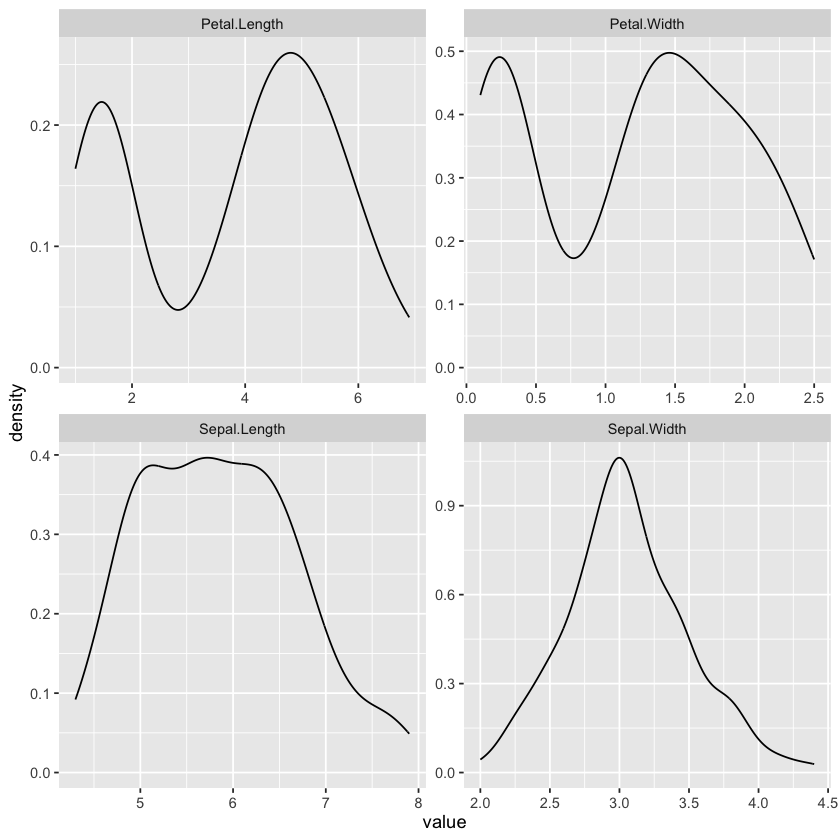

In [16]:
ggplot(iris_long , aes(value)) + geom_density() + facet_wrap(vars(key), scales = "free") 

We can save the last ggplot we created with the ggsave function.

In [17]:
ggsave(file.path(img_path, "facet_density.png"))

Saving 6.67 x 6.67 in image


This concludes the intro to Data Visualization in R!